In [ ]:

import json
import pandas as pd    
from os import listdir,mkdir
from os.path import isfile, join,exists
import numpy as np
import seaborn as sns
from dtaidistance.dtw_visualisation import plot_warp,plot_warpingpaths
from dtaidistance import dtw
import matplotlib.pyplot as plt

In [ ]:
final_folders2=['armraise/s_json','bicyclecrunch/s_json','birddog/s_json','curl/s_json','fly/s_json','legraise/s_json','overheadpress/s_json','pushup/s_json','squat/s_json','superman/s_json']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
finalPath='/Users/vikashmediboina/Documents/Exersise/Data'




In [ ]:
var={}
for path_index in range(0,len(final_folders2)):
    path=join(finalPath,final_folders2[path_index])
    print(path_index)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]
    variance={}
    mean_diff_data={}
    for file_index in range(0,len(onlyfiles)):
            f = open(join(path,onlyfiles[i]))
            data = json.load(f)
            
            for i in range(0,len(data['values'])):
                k=data['values'][i]['data']
                pdk=pd.DataFrame.from_dict(k)
                col=[]
                for key in pdk:
                    col.append(key)
                    if(not(key in variance)):
                        variance[key]={'x':[np.var(np.array(pdk[key]['x']))],'y':[np.var(np.array(pdk[key]['y']))]}
                        print_var(np.var(np.array(pdk[key]['x'])))   
                        print_var(np.var(np.array(pdk[key]['y'])))   
                    else:
                        variance[key]['x'].append(np.var(np.array(pdk[key]['x'])))
                        variance[key]['y'].append(np.var(np.array(pdk[key]['y'])))
                    if(not(key in mean_diff_data)):
                        mean_diff_data[key]={'x':[np.array(pdk[key]['x'])-np.mean(pdk[key]['x'])],'y':[np.array(pdk[key]['y'])-np.mean(pdk[key]['y'])]}
                    else:
                        mean_diff_data[key]['x'].append(np.array(pdk[key]['x'])-np.mean(pdk[key]['x']))
                        mean_diff_data[key]['y'].append(np.array(pdk[key]['y'])-np.mean(pdk[key]['y']))
    for key in col:
        if(not(key in var)):
                    var[key]={'x':[np.mean((variance[key]['x']))],'y':[np.mean((variance[key]['y']))]}
        else:
                    var[key]['x'].append(int(np.mean(np.array(variance[key]['x']))))
                    var[key]['y'].append(int(np.mean(np.array(variance[key]['y']))))

0


NameError: name 'i' is not defined

In [ ]:
def print_var(val):
    if(val>100):
        print(val)

In [ ]:
x=[]
y=[]
for key in col:
    x.append(np.array((var[key]['x']))+np.array(var[key]['y'])/50)

x_df = pd.DataFrame(x,index=col,columns=labels).transpose()
ax = plt.axes()
sns.heatmap(x_df,vmax=150)
ax.set_title('Heat map of all Exercise')
plt.show()


NameError: name 'col' is not defined

In [ ]:
#superman
path=join(finalPath,'bicyclecrunch/o_json/000000.json')
f = open(path)
data = json.load(f)
data['values'][0]['data'][1]


[191,
 164,
 178,
 187,
 187,
 209,
 160,
 159,
 174,
 186,
 167,
 169,
 176,
 162,
 191,
 164,
 178,
 187,
 185,
 209,
 160,
 159,
 174,
 186,
 167,
 169,
 176,
 162,
 191,
 164,
 178,
 187,
 182,
 208,
 160,
 159,
 174,
 186,
 167,
 169,
 175,
 161,
 190,
 165,
 179,
 187,
 178,
 206,
 160,
 159,
 175,
 185,
 167,
 169,
 174,
 161,
 190,
 165,
 180,
 187,
 174,
 204,
 160,
 159,
 175,
 184,
 166,
 170,
 173,
 160,
 190,
 167,
 182,
 187,
 171,
 201,
 161,
 159,
 175,
 183,
 165,
 171,
 173,
 160,
 190,
 169,
 184,
 187,
 168,
 198,
 161,
 160,
 175,
 182,
 165,
 172,
 173,
 160,
 190,
 171,
 186,
 187,
 165,
 195,
 161,
 160,
 175,
 182,
 164,
 173,
 172,
 160,
 189,
 173,
 188,
 187,
 163,
 192,
 161,
 160,
 175,
 181,
 164,
 173,
 173,
 160,
 189,
 176,
 191,
 187,
 162,
 190,
 161,
 161,
 174,
 180,
 163,
 174,
 173,
 160,
 189,
 179,
 194,
 187,
 161,
 187,
 161,
 161,
 174,
 180,
 163,
 174,
 173,
 160,
 189,
 182,
 197,
 187,
 161,
 185,
 161,
 161,
 174,
 179,
 162,
 174,
 173

In [ ]:
s1 = np.array(data['values'][0]['data'][1], dtype=np.double)
s2 = np.array(data['values'][1]['data'][1], dtype=np.double)

NameError: name 'np' is not defined

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >])

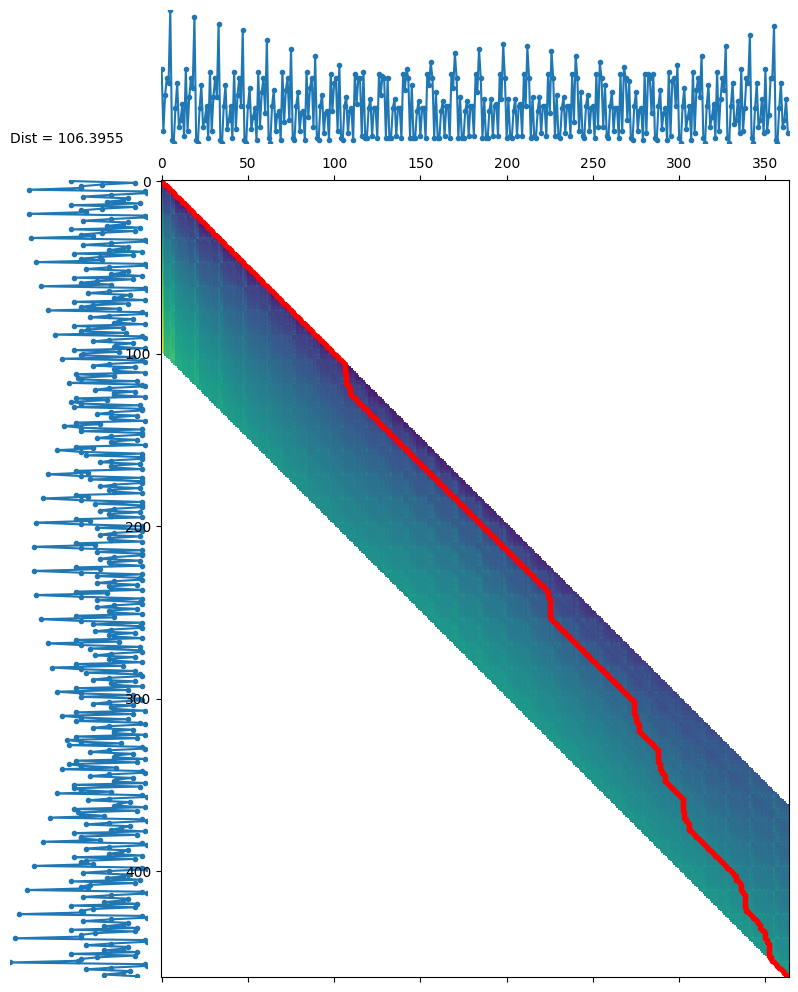

In [ ]:
d2, paths = dtw.warping_paths(s1, s2, window=2)
best_path = dtw.best_path(paths)
plot_warpingpaths(s1, s2, paths, best_path)


In [ ]:
bicyclecrunch=get_data(1)
birddog=get_data(2)

In [ ]:
def get_data(index):
    path=join(finalPath,final_folders2[index])
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]
    variance={}
    mean_diff_data={}
    f = open(join(path,onlyfiles[0]))
    data = json.load(f)

    k=data['values'][0]['data']
    pdk=pd.DataFrame.from_dict(k)
    col=[]
    for key in pdk:
                    col.append(key)
                    if(not(key in mean_diff_data)):
                        mean_diff_data[key]={'x':[np.array(pdk[key]['x'])-np.mean(pdk[key]['x'])],'y':[np.array(pdk[key]['y'])-np.mean(pdk[key]['y'])]}
                    else:
                        mean_diff_data[key]['x'].append(np.array(pdk[key]['x'])-np.mean(pdk[key]['x']))
                        mean_diff_data[key]['y'].append(np.array(pdk[key]['y'])-np.mean(pdk[key]['y']))
                        
    return mean_diff_data

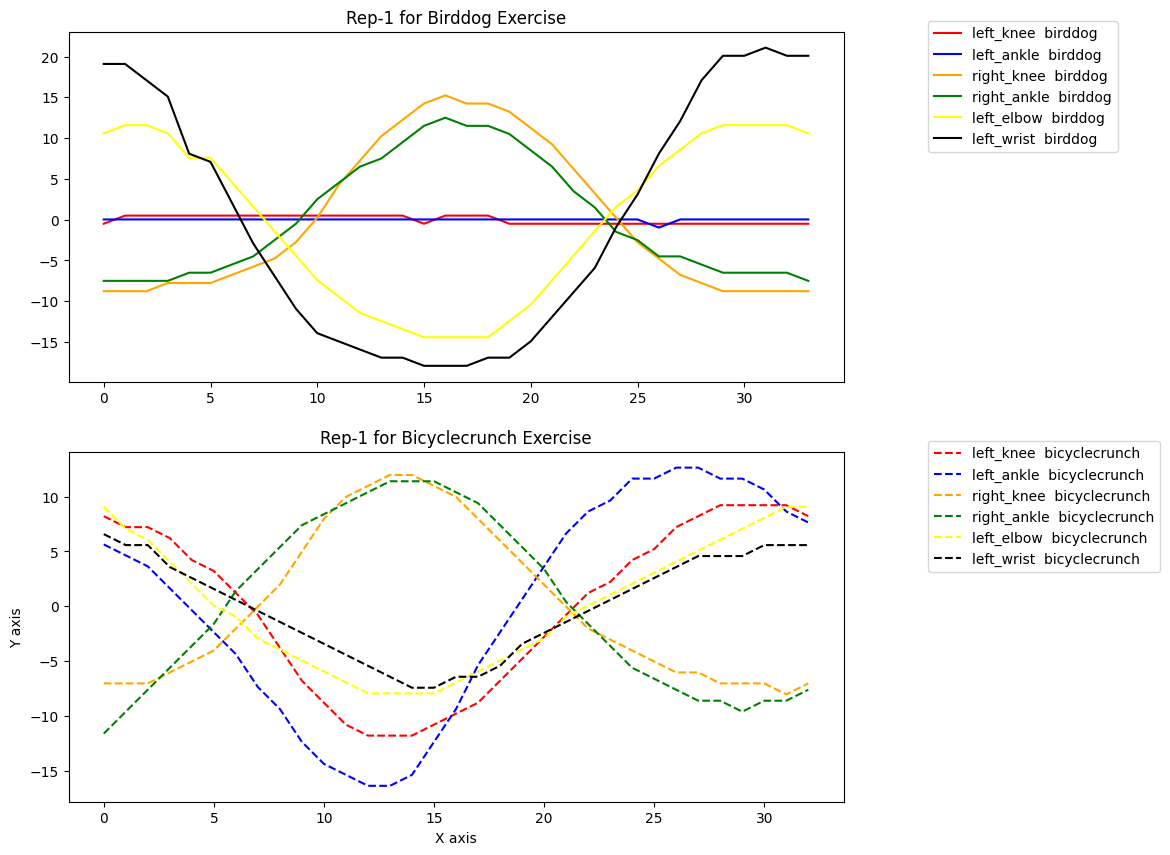

In [ ]:
fig, axs = plt.subplots(2, 1,figsize=(10, 10))
shapes=['left_knee','left_ankle','right_knee','right_ankle','left_elbow','left_wrist']
color=['red','blue','orange','green','yellow','black']
for index in range(0,len(shapes)):
    x=np.arange(start=0, stop=len(birddog[shapes[index]]['x'][0]), step=1)
    x1=np.arange(start=0, stop=len(bicyclecrunch[shapes[index]]['x'][0]), step=1)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    axs[1].plot(x1, bicyclecrunch[shapes[index]]['x'][0],'--'  ,color =color[index],label=(shapes[index]+"  bicyclecrunch"))
    axs[0].plot(x, birddog[shapes[index]]['x'][0], color =color[index],label=(shapes[index]+"  birddog"))
axs[1].legend(bbox_to_anchor=(1.1, 1.05))    
axs[0].legend(bbox_to_anchor=(1.1, 1.05))    
axs[1].set_title("Rep-1 for Bicyclecrunch Exercise")
axs[0].set_title("Rep-1 for Birddog Exercise")
plt.show()

plt.show()

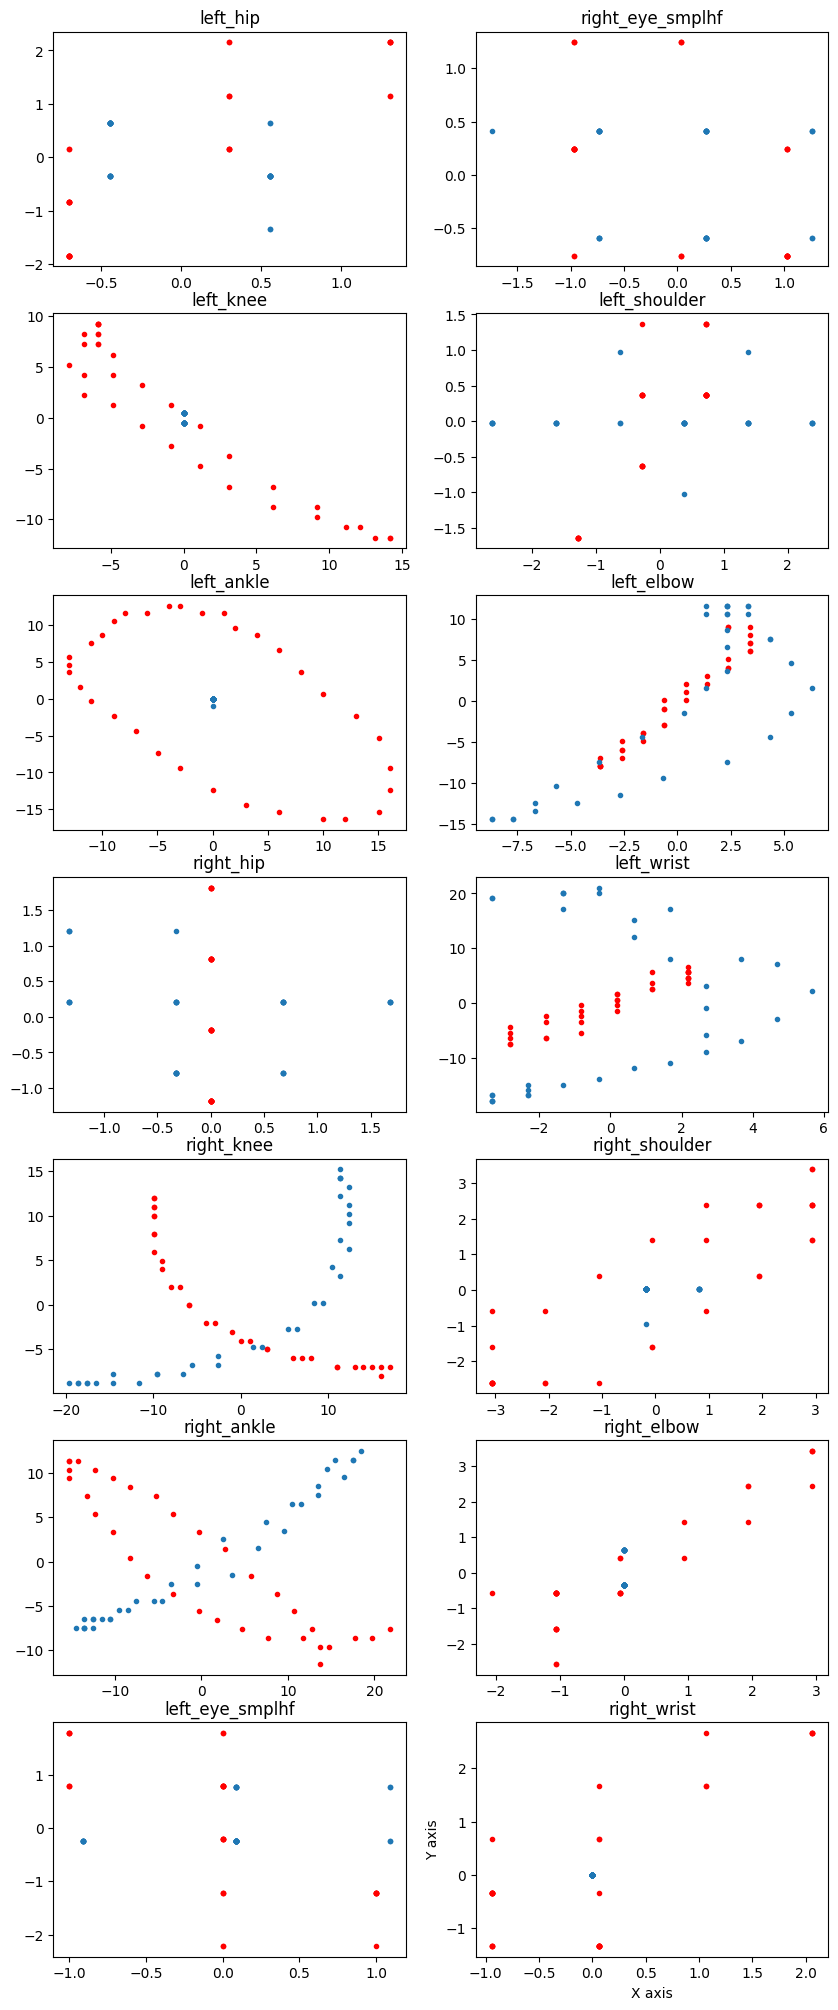

In [ ]:
fig, axs = plt.subplots(7, 2,figsize=(10, 25))
for index in range(0,len(col)):
#     x=np.arange(start=0, stop=len(birddog[col[index]]['x'][0]), step=1)
#     x1=np.arange(start=0, stop=len(bicyclecrunch[shapes[index]]['x'][0]), step=1)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    
    axs[index%7,int(index/7)].plot(bicyclecrunch[col[index]]['y'][0], bicyclecrunch[col[index]]['x'][0],'.',color='red',label=(col[index]+"  bicyclecrunch"))
    axs[index%7,int(index/7)].plot(birddog[col[index]]['y'][0], birddog[col[index]]['x'][0],'.',label=(col[index]+"  birddog"))
    axs[index%7,int(index/7)].set_title(col[index])
# plt.legend(bbox_to_anchor=(1.1, 1.05))    

plt.show()

